In [99]:
from langdetect import detect
import pandas as pd
parse_dates = ['time']
all_data = pd.read_csv('text_location_timeseries.csv', parse_dates = parse_dates, low_memory = False)

texts = all_data['text']

dectected_languages = []
for text in texts:
    try:
        language = detect(text)
    except:
        language = '?'
    dectected_languages.append(language)


In [100]:
# get frequency dictionaries for languages

from collections import Counter

specified_languages_dict = Counter(all_data['lang'])
detected_languages_dict = Counter(dectected_languages)


In [101]:
# exclude languages from language frequency dictionary that appear less often than cutoff

def filteringLangDict(lang_dict, cutoff):
    filtered_dict = {}
    for key in lang_dict.keys():
        if lang_dict[key] > cutoff:
            filtered_dict[key] = lang_dict[key]
    return filtered_dict


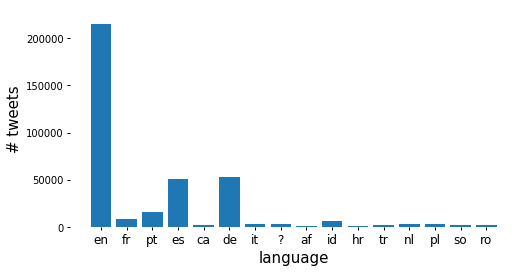

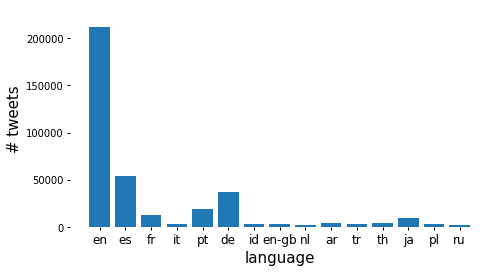

In [106]:

fig_path_detected_c = '/home/maria/Work/csss/projects/twitter/pictures/language_detection_detected_cutoff.pdf'
fig_path_specified_c = '/home/maria/Work/csss/projects/twitter/pictures/language_detection_twitter_cutoff.pdf'

test = plotLanguageHistiogram(filteringLangDict(detected_languages_dict,1000),fig_path_detected_c)
test = plotLanguageHistiogram(filteringLangDict(specified_languages_dict,1000),fig_path_specified_c)


In [103]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plotLanguageHistiogram(lang_dict, fig_path):
    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),   
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),   
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),   
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),   
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    
    for i in range(len(tableau20)):   
        r, g, b = tableau20[i]   
        tableau20[i] = (r / 255., g / 255., b / 255.)

    plt.figure(figsize=(0.5*len(lang_dict.keys()), 4))
    ax = plt.subplot(111)
    ax.get_xaxis().tick_bottom()   
    ax.get_yaxis().tick_left()
    ax.yaxis.set_tick_params(width=1,length=3)
    ax.xaxis.set_tick_params(width=1,length=3)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)   
    ax.spines["right"].set_visible(False)   
    ax.spines["left"].set_visible(False)  
    plt.ylim(-100, 230000)

    plt.bar(range(len(lang_dict)), lang_dict.values(), align='center')
    plt.xticks(range(len(lang_dict)), list(lang_dict.keys()), fontsize=12)


    #fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    #fmt = '%.0f' # Format you want the ticks, e.g. '40%'

    #yticks = mtick.FormatStrFormatter(fmt)
    #ax.yaxis.set_major_formatter(yticks)

    ax.set_xlabel('language', fontsize=15)
    ax.set_ylabel('# tweets', fontsize=15)

    plt.savefig(fig_path, bbox_inches="tight") 
